# Prepare Dataset for Model Training and Evaluating

# Amazon Customer Reviews Dataset

https://s3.amazonaws.com/amazon-reviews-pds/readme.html

## Schema

- `marketplace`: 2-letter country code (in this case all "US").
- `customer_id`: Random identifier that can be used to aggregate reviews written by a single author.
- `review_id`: A unique ID for the review.
- `product_id`: The Amazon Standard Identification Number (ASIN).  `http://www.amazon.com/dp/<ASIN>` links to the product's detail page.
- `product_parent`: The parent of that ASIN.  Multiple ASINs (color or format variations of the same product) can roll up into a single parent.
- `product_title`: Title description of the product.
- `product_category`: Broad product category that can be used to group reviews (in this case digital videos).
- `star_rating`: The review's rating (1 to 5 stars).
- `helpful_votes`: Number of helpful votes for the review.
- `total_votes`: Number of total votes the review received.
- `vine`: Was the review written as part of the [Vine](https://www.amazon.com/gp/vine/help) program?
- `verified_purchase`: Was the review from a verified purchase?
- `review_headline`: The title of the review itself.
- `review_body`: The text of the review.
- `review_date`: The date the review was written.

# Checking Pre-Requisites from the Previous `01_setup/` Folder

In [1]:
%store -r setup_instance_check_passed

In [2]:
try:
    setup_instance_check_passed
except NameError:
    print('+++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.')
    print('+++++++++++++++++++++++++++++++')

In [3]:
print(setup_instance_check_passed)

True


In [4]:
%store -r setup_dependencies_passed

In [5]:
try:
    setup_dependencies_passed
except NameError:
    print('+++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.')
    print('+++++++++++++++++++++++++++++++')

In [6]:
print(setup_dependencies_passed)

True


In [7]:
%store -r setup_s3_bucket_passed

In [8]:
try:
    setup_s3_bucket_passed    
except NameError:
    print('+++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.')
    print('+++++++++++++++++++++++++++++++')

In [9]:
print(setup_s3_bucket_passed)

True


In [10]:
%store -r setup_iam_roles_passed

In [11]:
try:
    setup_iam_roles_passed  
except NameError:
    print('+++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.') 
    print('+++++++++++++++++++++++++++++++')

In [12]:
print(setup_iam_roles_passed)

True


## Check if requirements passed

In [13]:
if not setup_instance_check_passed:
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.')
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
if not setup_dependencies_passed:
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.')
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
if not setup_s3_bucket_passed:
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.')
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
if not setup_iam_roles_passed:
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.') 
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

In [14]:
import boto3
import sagemaker
import pandas as pd

sess   = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

## Download

Let's start by retrieving a subset of the Amazon Customer Reviews dataset.

In [15]:
!aws s3 cp 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Software_v1_00.tsv.gz' ./data/

download: s3://amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Software_v1_00.tsv.gz to data/amazon_reviews_us_Digital_Software_v1_00.tsv.gz


In [16]:
import csv

df = pd.read_csv('./data/amazon_reviews_us_Digital_Software_v1_00.tsv.gz', 
                 delimiter='\t', 
                 quoting=csv.QUOTE_NONE,
                 compression='gzip')
df.shape

(102084, 15)

In [17]:
df.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,17747349,R2EI7QLPK4LF7U,B00U7LCE6A,106182406,CCleaner Free [Download],Digital_Software,4,0,0,N,Y,Four Stars,So far so good,2015-08-31
1,US,10956619,R1W5OMFK1Q3I3O,B00HRJMOM4,162269768,ResumeMaker Professional Deluxe 18,Digital_Software,3,0,0,N,Y,Three Stars,Needs a little more work.....,2015-08-31
2,US,13132245,RPZWSYWRP92GI,B00P31G9PQ,831433899,Amazon Drive Desktop [PC],Digital_Software,1,1,2,N,Y,One Star,Please cancel.,2015-08-31
3,US,35717248,R2WQWM04XHD9US,B00FGDEPDY,991059534,Norton Internet Security 1 User 3 Licenses,Digital_Software,5,0,0,N,Y,Works as Expected!,Works as Expected!,2015-08-31
4,US,17710652,R1WSPK2RA2PDEF,B00FZ0FK0U,574904556,SecureAnywhere Intermet Security Complete 5 De...,Digital_Software,4,1,2,N,Y,Great antivirus. Worthless customer support,I've had Webroot for a few years. It expired a...,2015-08-31


Text(0, 0.5, 'Review Count')

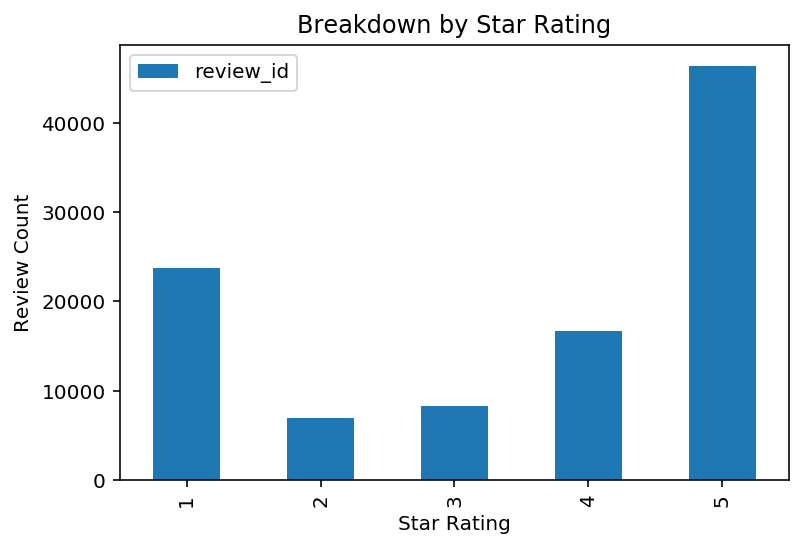

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

df[['star_rating', 'review_id']].groupby('star_rating').count().plot(kind='bar', title='Breakdown by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Review Count')

# Balance the Dataset

In [19]:
from sklearn.utils import resample

five_star_df = df.query('star_rating == 5')
four_star_df = df.query('star_rating == 4')
three_star_df = df.query('star_rating == 3')
two_star_df = df.query('star_rating == 2')
one_star_df = df.query('star_rating == 1')

# Check which sentiment has the least number of samples
minority_count = min(five_star_df.shape[0], 
                     four_star_df.shape[0], 
                     three_star_df.shape[0], 
                     two_star_df.shape[0], 
                     one_star_df.shape[0]) 

five_star_df = resample(five_star_df,
                        replace = False,
                        n_samples = minority_count,
                        random_state = 27)

four_star_df = resample(four_star_df,
                        replace = False,
                        n_samples = minority_count,
                        random_state = 27)

three_star_df = resample(three_star_df,
                        replace = False,
                        n_samples = minority_count,
                        random_state = 27)

two_star_df = resample(two_star_df,
                        replace = False,
                        n_samples = minority_count,
                        random_state = 27)

one_star_df = resample(one_star_df,
                        replace = False,
                        n_samples = minority_count,
                        random_state = 27)

df_balanced = pd.concat([five_star_df, four_star_df, three_star_df, two_star_df, one_star_df])
df_balanced = df_balanced.reset_index(drop=True)

df_balanced.shape

(34450, 15)

Text(0, 0.5, 'Review Count')

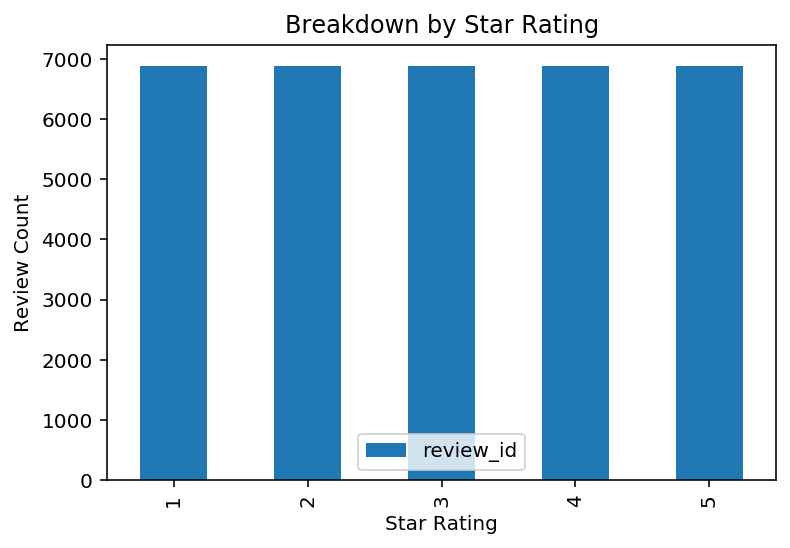

In [20]:
df_balanced[['star_rating', 'review_id']].groupby('star_rating').count().plot(kind='bar', title='Breakdown by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Review Count')

In [21]:
df_balanced.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,50930584,R2O4Y7L17EATTI,B008SCNF1S,531153669,Norton Antivirus 2013 - 1 User / 1 PC,Digital_Software,5,0,0,N,Y,great deal - easy to get,I needed an antivirus application and know the...,2013-05-29
1,US,33559471,R3P99W19J4VL4I,B004E9SKEQ,401204792,Microsoft Office Home & Student 2010 - 3PC/1Us...,Digital_Software,5,0,0,N,Y,Great way to keep up to date.,Amazon is providing us a great service by offe...,2014-06-05
2,US,34635641,R3EQ2D5RZF7E4Q,B008SCNLEY,643150354,Norton 360 2013 - 1 User / 3 PC,Digital_Software,5,0,0,N,Y,It works good enough for me.,I bought my 2012 Nortons around the same time ...,2013-10-31
3,US,16625170,R26CNHO8M2EUMN,B00NG7JU4Q,834049942,TurboTax Deluxe Fed + Efile,Digital_Software,5,4,6,N,N,DIY still wins...,"I know, I know... I'm a Mac user who still us...",2014-11-26
4,US,47073366,RD0SSJ3HGIU42,B008SCNLEY,643150354,Norton 360 2013 - 1 User / 3 PC,Digital_Software,5,0,0,N,Y,Easy!,Easy. I used it on 2 devices. I am very please...,2014-06-01


# Split the Data into Train, Validation, and Test Sets

In [22]:
from sklearn.model_selection import train_test_split

# Split all data into 90% train and 10% holdout
df_train, df_holdout = train_test_split(df_balanced, 
                                        test_size=0.10,
                                        stratify=df_balanced['star_rating'])

# Split holdout data into 50% validation and 50% test
df_validation, df_test = train_test_split(df_holdout,
                                          test_size=0.50, 
                                          stratify=df_holdout['star_rating'])


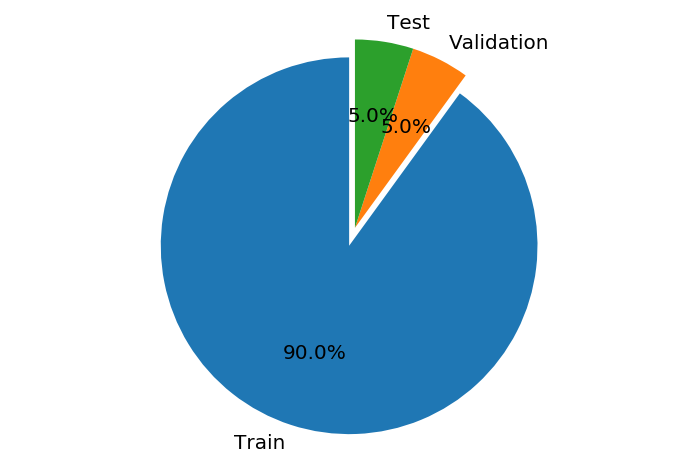

In [23]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Train', 'Validation', 'Test']
sizes = [len(df_train.index), len(df_validation.index), len(df_test.index)]
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

plt.show()

# Show 90% Train Data Split

In [24]:
df_train.shape

(31005, 15)

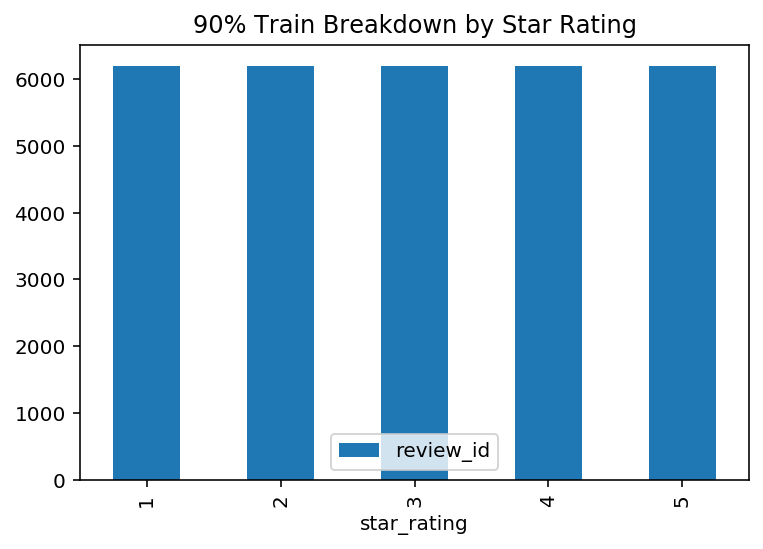

In [25]:
df_train[['star_rating', 'review_id']].groupby('star_rating').count().plot(kind='bar', title='90% Train Breakdown by Star Rating')

# Show 5% Validation Data Split

In [26]:
df_validation.shape

(1722, 15)

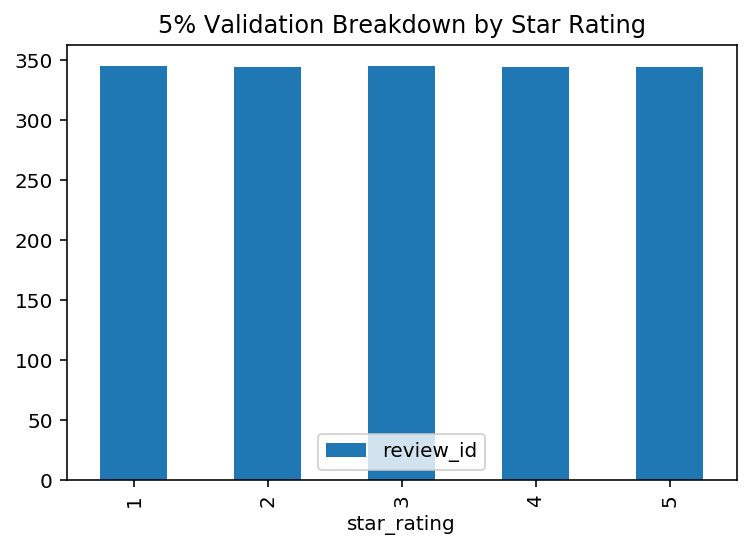

In [27]:
df_validation[['star_rating', 'review_id']].groupby('star_rating').count().plot(kind='bar', title='5% Validation Breakdown by Star Rating')

# Show 5% Test Data Split

In [28]:
df_test.shape

(1723, 15)

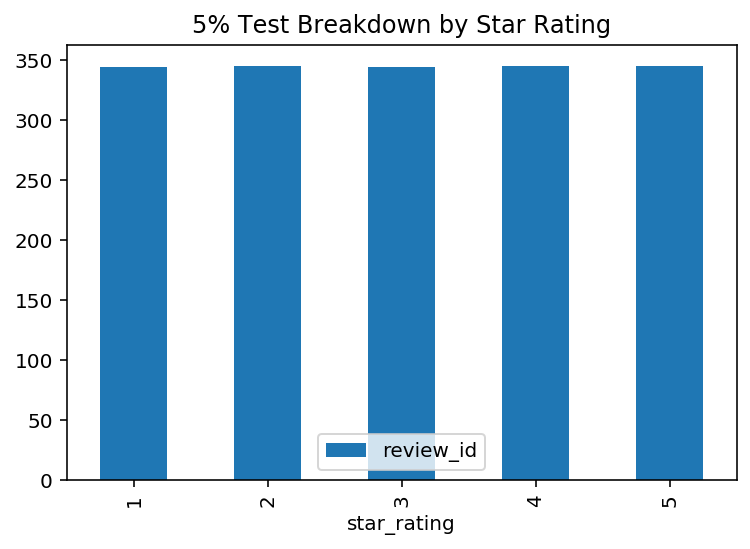

In [29]:
df_test[['star_rating', 'review_id']].groupby('star_rating').count().plot(kind='bar', title='5% Test Breakdown by Star Rating')

# Select `star_rating` and `review_body` for Training

In [30]:
df_train = df_train[['star_rating', 'review_body']]
df_train.shape

(31005, 2)

In [31]:
df_train.head(5)

,star_rating,review_body
4064,5,We are a new church and we were looking for so...
788,5,I've been using TurboTax for several years. I...
26907,2,"Worked as expected, however, I have only given..."
10500,4,I have been using Quicken for a long time. I ...
24667,2,its nothin but a few days sample


# Write a Train CSV with Header for Autopilot 

In [32]:
autopilot_train_path = './amazon_reviews_us_Digital_Software_v1_00_autopilot.csv'
df_train.to_csv(autopilot_train_path, index=False, header=True)

# Upload Train Data to S3 for Autopilot

In [33]:
train_s3_prefix = 'data'
autopilot_train_s3_uri = sess.upload_data(path=autopilot_train_path, key_prefix=train_s3_prefix)
autopilot_train_s3_uri

's3://sagemaker-us-west-2-085964654406/data/amazon_reviews_us_Digital_Software_v1_00_autopilot.csv'

In [34]:
!aws s3 ls $autopilot_train_s3_uri

2020-09-26 15:56:31   13636489 amazon_reviews_us_Digital_Software_v1_00_autopilot.csv


# Store Variables for Next Notebook(s)

In [35]:
%store autopilot_train_s3_uri

Stored 'autopilot_train_s3_uri' (str)


In [36]:
%store

Stored variables and their in-db values:
autopilot_train_s3_uri                  -> 's3://sagemaker-us-west-2-085964654406/data/amazon
setup_dependencies_passed               -> True
setup_iam_roles_passed                  -> True
setup_instance_check_passed             -> True
setup_s3_bucket_passed                  -> True


In [ ]:
%%javascript
Jupyter.notebook.save_checkpoint();
Jupyter.notebook.session.delete();